# Reproducible Analysis 

### Part one - Data cleaning, processing and selection 

In [2]:
# Set download URL
url1 = 'https://github.com/ucfnyue/i2p_Assessment/blob/main/2020-12-24-listings.csv.gz?raw=True'
url2 = 'https://github.com/ucfnyue/i2p_Assessment/blob/main/2020-08-24-listings.csv.gz?raw=True'
import pandas as pd

df1 = pd.read_csv(url1, compression='gzip', low_memory=False)
df2 = pd.read_csv(url2, compression='gzip', low_memory=False)

In [7]:
cols1 = ['id', 'name', 'description', 'host_id', 
        'host_is_superhost', 'host_total_listings_count', 
        'latitude', 'longitude', 'property_type', 'room_type', 
        'price', 'availability_365', 'number_of_reviews', 
        'calculated_host_listings_count', 'reviews_per_month']
cols2 = ['id', 'name', 'description', 'host_id', 
        'host_is_superhost', 'host_total_listings_count', 
        'latitude', 'longitude', 'property_type', 'room_type', 
        'price', 'availability_365', 'number_of_reviews', 
        'calculated_host_listings_count', 'reviews_per_month']

df1 = pd.read_csv(url1, compression='gzip', low_memory=False, usecols=cols1, nrows=10000)
df2 = pd.read_csv(url2, compression='gzip', low_memory=False, usecols=cols2, nrows=10000)

print(f"Dataframe1 is {df1.shape[0]:,} x {df1.shape[1]}")
print(f"Dataframe2 is {df2.shape[0]:,} x {df2.shape[1]}")

Dataframe1 is 10,000 x 15
Dataframe2 is 10,000 x 15


In [11]:
df1[df1.id.isna()][['id','name','description','host_id', 'room_type']]
df1.drop(df1[df1.id.isna()].index.values, axis=0, inplace=True)

df2[df2.id.isna()][['id','name','description','host_id', 'room_type']]
df2.drop(df2[df2.id.isna()].index.values, axis=0, inplace=True)

In [13]:
df1.isnull().sum(axis=0).sort_values(ascending=False)[:12]  # Counting Nulls by Column

reviews_per_month                 1908
host_total_listings_count           14
host_is_superhost                   14
description                         14
name                                10
calculated_host_listings_count       0
number_of_reviews                    0
availability_365                     0
price                                0
room_type                            0
property_type                        0
longitude                            0
dtype: int64

In [14]:
df2.isnull().sum(axis=0).sort_values(ascending=False)[:12]

reviews_per_month                 1811
description                         13
name                                 9
host_total_listings_count            6
host_is_superhost                    6
calculated_host_listings_count       1
number_of_reviews                    1
availability_365                     1
price                                1
room_type                            1
property_type                        1
longitude                            1
dtype: int64

In [16]:
df1.drop(columns=['reviews_per_month'], inplace=True)

KeyError: "['reviews_per_month'] not found in axis"

In [17]:
df1.isnull().sum(axis=1).sort_values(ascending=False) # Counting Nulls by Row

7841    2
7149    2
6008    2
6279    2
5942    2
       ..
6656    0
6655    0
6654    0
6653    0
0       0
Length: 10000, dtype: int64

In [18]:
df2.isnull().sum(axis=1).sort_values(ascending=False) 

3558    10
6453     2
9767     2
8992     2
8052     2
        ..
6658     0
6657     0
6656     0
6655     0
0        0
Length: 9999, dtype: int64

In [ ]:
probs1 = df1.isnull().sum(axis=1)
print(type(probs1))       
probs1.plot.hist(bins=40) 
df1.drop(probs1[probs1 > 1].index, inplace=True)
print(f"Have reduced datframe1 to: {df1.shape[0]} rows and {df1.shape[1]} columns")

<class 'pandas.core.series.Series'>


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

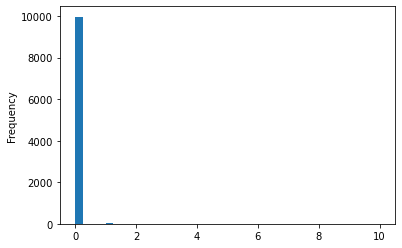

In [21]:
probs2 = df2.isnull().sum(axis=1)
print(type(probs2))       
probs2.plot.hist(bins=40) 
df2.drop(probs1[probs2 > 5].index, inplace=True)
print(f"Have reduced dataframe2 to: {df2.shape[0]} rows and {df2.shape[1]} columns")

In [29]:
cats1 = ['property_type','room_type']   # Categories
df1.sample(5, random_state=43)[cats1]  
df1[cats1[0]].value_counts()

df1[cats1[1]].value_counts()

for c in cats1:
    print(f"Converting {c}")
    df1[c] = df1[c].astype('category')
    
print(df1[cats1[1]].cat.categories.values)

Converting property_type
Converting room_type
['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']


In [30]:
cats2 = ['property_type','room_type']   # Categories
df2.sample(5, random_state=44)[cats2]  
df2[cats2[0]].value_counts()

df2[cats2[1]].value_counts()

for c in cats2:
    print(f"Converting {c}")
    df2[c] = df2[c].astype('category')
    
print(df2[cats2[1]].cat.categories.values)

Converting property_type
Converting room_type
['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']


In [34]:
money1 = ['price']  # Dealing with Strings

for m in money1:
    print(f"Converting {m}")
    df1[m] = df1[m].str.replace('$','').str.replace(',','').astype('float')

Converting price


AttributeError: Can only use .str accessor with string values!

In [79]:
money2 = ['price']  # Dealing with Strings

for m in money2:
    print(f"Converting {m}")
    df2[m] = df2[m].str.replace('$','').str.replace(',','').astype('float')

,price
5345,90.0
7445,75.0
1731,85.0
8720,100.0
4522,200.0


In [38]:
print(df1[money1[0]].dtype)
print(df2[money2[0]].dtype)

float64
float64


In [41]:
df2[['price','longitude','latitude']].describe(percentiles=[0.25, 0.75])

,price,longitude,latitude
count,9998.000000,9998.000000,9998.000000
mean,101.059019,-0.127702,51.511254
std,131.898216,0.087362,0.046540
min,11.000000,-0.479620,51.297330
25%,45.000000,-0.190220,51.481065
50%,75.000000,-0.119300,51.516855
75%,120.000000,-0.069933,51.542997
max,5000.000000,0.240830,51.675010


In [51]:
df1['z'] = (df1.price - df1.price.mean()) / df1.price.std()
df1.z.describe()

count    9.986000e+03
mean    -4.696157e-17
std      1.000000e+00
min     -3.512220e-01
25%     -2.200106e-01
50%     -1.042358e-01
75%      6.942639e-02
max      6.242958e+01
Name: z, dtype: float64

In [52]:
df1['iqs'] = (df1.price - df1.price.quantile(0.25))/(df1.price.quantile(0.75)-df1.price.quantile(0.25))
df1.iqs.describe()

count    9986.000000
mean        0.760133
std         3.454984
min        -0.453333
25%         0.000000
50%         0.400000
75%         1.000000
max       216.453333
Name: iqs, dtype: float64

In [54]:
import numpy as np
df1['lnprice'] = np.log(df1.price)
df1.lnprice.describe()

count    9986.000000
mean        4.321370
std         0.695276
min         2.397895
25%         3.806662
50%         4.317488
75%         4.787492
max         9.697631
Name: lnprice, dtype: float64

In [55]:
df2['z'] = (df2.price - df2.price.mean()) / df2.price.std()
df2.z.describe()

df2['iqs'] = (df2.price - df2.price.quantile(0.25))/(df2.price.quantile(0.75)-df2.price.quantile(0.25))
df2.iqs.describe()

import numpy as np
df2['lnprice'] = np.log(df2.price)
df2.lnprice.describe()

count    9998.000000
mean        4.330223
std         0.698685
min         2.397895
25%         3.806662
50%         4.317488
75%         4.787492
max         8.517193
Name: lnprice, dtype: float64

<AxesSubplot:ylabel='Density'>

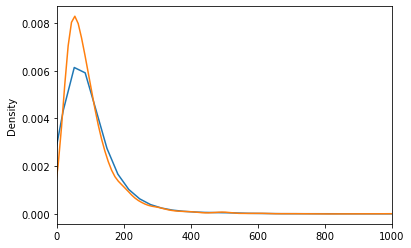

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

df1.price.plot.kde(xlim=(0,1000)) #kernel density estimate plot
df2.price.plot.kde(xlim=(0,1000)) #kernel density estimate plot

### Part two - Data analysis, visualization and aggregation 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

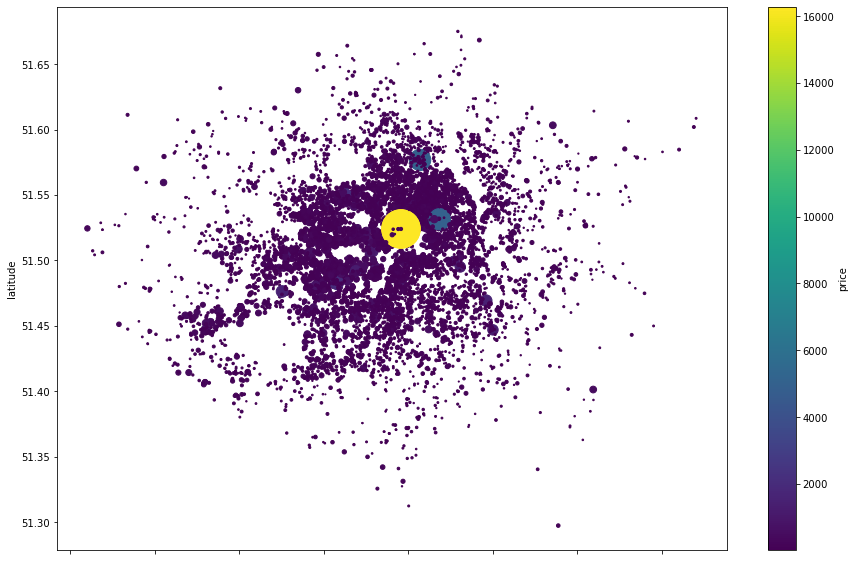

In [68]:
df1.plot.scatter(x='longitude', y='latitude', c='price', s=(df1.price/df1.price.min()), cmap='viridis', figsize=(15,10))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

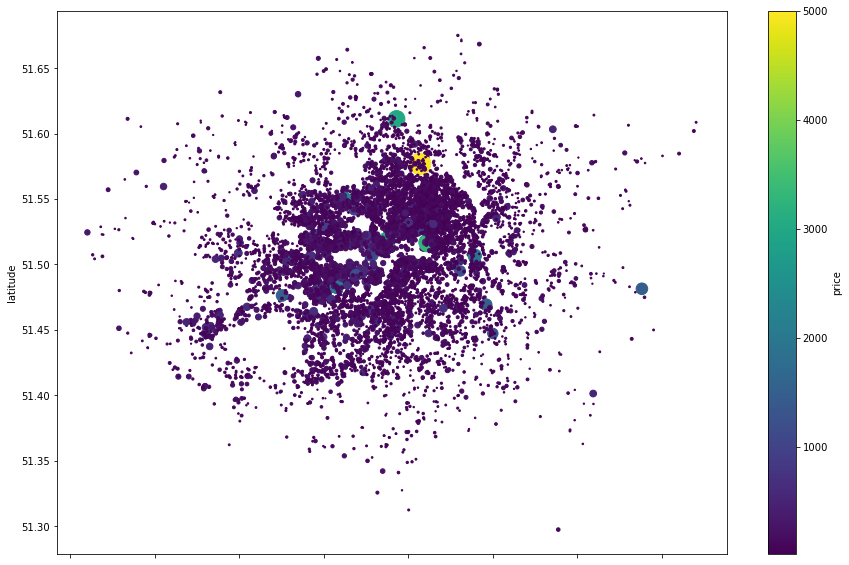

In [69]:
df2.plot.scatter(x='longitude', y='latitude', c='price', s=(df2.price/df2.price.min()), cmap='viridis', figsize=(15,10))

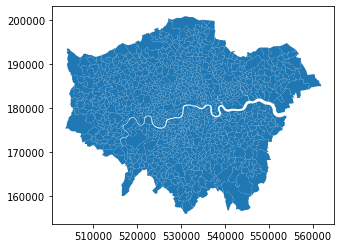

In [72]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.pyplot as plt

msoas = gpd.read_file('https://github.com/ucfnyue/i2p_Assessment/blob/main/MSOA/Middle_Layer_Super_Output_Areas__December_2011__EW_BGC_V2-shp.zip?raw=true')
boros = gpd.read_file('https://github.com/ucfnyue/i2p_Assessment/blob/main/shapefiles/Boroughs.gpkg?raw=true')
ldn = gpd.GeoDataFrame(gpd.GeoSeries(data=boros.unary_union, crs='epsg:27700')).rename(columns={0:'original'})

ldn['geometry'] = ldn.original.buffer(250)
ldn = ldn.set_geometry('geometry')

ldn_msoas = gpd.sjoin(msoas, ldn, op='within')
ldn_msoas.plot();
del(msoas)

In [75]:
ldn_msoas['Borough'] = ldn_msoas.MSOA11NM.str.replace(r' \d+$','',regex=True)

In [77]:
# Add MSOA Names using a Merge
msoa_nms = pd.read_csv('https://github.com/ucfnyue/i2p_Assessment/blob/main/MSOA/MSOA-Names-1.8.csv.gz?raw=true', compression='gzip')

msoas = pd.merge(ldn_msoas, msoa_nms, left_on='MSOA11CD', right_on='msoa11cd', how='inner')
print(msoas.shape)
print(type(msoas))

to_drop = ['MSOA11NMW','LONG','LAT','Shape__Are','Shape__Len','index_right',
           'original','msoa11cd','msoa11nm','msoa11nmw','Laname','msoa11hclnmw']
msoas.drop(columns=to_drop, inplace=True)

(983, 20)
<class 'geopandas.geodataframe.GeoDataFrame'>


In [81]:
# using the InsideAirbnb data in Part one 
# clean the data

df1.drop(df1[((df1.latitude.isna())|(df1.longitude.isna()))].index, axis=0, inplace=True)
df1.drop(df1[((df1.latitude < 40)|(df1.longitude > 1))].index, axis=0, inplace=True)

df2.drop(df2[((df2.latitude.isna())|(df2.longitude.isna()))].index, axis=0, inplace=True)
df2.drop(df2[((df2.latitude < 40)|(df2.longitude > 1))].index, axis=0, inplace=True)

In [82]:
# Add Geometry and Reproject
gdf1 = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.longitude, df1.latitude, crs='epsg:4326'))
gdf1 = gdf1.to_crs('epsg:27700')

gdf2 = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.longitude, df2.latitude, crs='epsg:4326'))
gdf2 = gdf2.to_crs('epsg:27700')

In [99]:
# Add LA Names to Data
gdf_la1 = gpd.sjoin(gdf1, boros, op='within', how='left')
gdf_la2 = gpd.sjoin(gdf2, boros, op='within', how='left')

# Tidy up
gdf_la1.drop(columns=['index_right','HECTARES','NONLD_AREA','ONS_INNER'], inplace=True)
gdf_la2.drop(columns=['index_right','HECTARES','NONLD_AREA','ONS_INNER'], inplace=True)

# Drop Problematic Results
gdf_la1.drop(index=gdf1[gdf_la1.NAME.isna()].index, axis=1, inplace=True)
gdf_la2.drop(index=gdf2[gdf_la2.NAME.isna()].index, axis=1, inplace=True)

(0.0, 300.0)

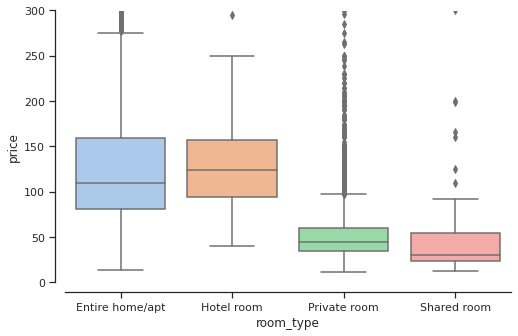

In [105]:
# Boxplots between room types 2020-12-24
sns.set_style('whitegrid')
sns.set_theme(style="ticks", palette="pastel")
f,ax = plt.subplots(figsize=(8,5))
sns.boxplot(y=gdf_la1.price, x=gdf_la1.room_type)
sns.despine(offset=10)
ax.set_ylim([0,300])

(0.0, 300.0)

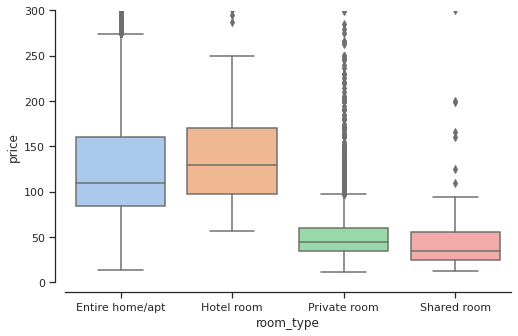

In [106]:
# Boxplots between room types 2020-12-24
sns.set_style('whitegrid')
sns.set_theme(style="ticks", palette="pastel")
f,ax = plt.subplots(figsize=(8,5))
sns.boxplot(y=gdf_la2.price, x=gdf_la2.room_type)
sns.despine(offset=10)
ax.set_ylim([0,300])

In [110]:
# Grouping on One Column

la_data1 = gdf_la1.groupby(['NAME'])
la_data2 = gdf_la2.groupby(['NAME'])

In [108]:
la_data1.price.mean()  # Differences in mean prices 2020-12-24

NAME
Barking and Dagenham       63.791667
Barnet                     71.505952
Bexley                     41.000000
Brent                      91.024221
Bromley                    69.520000
Camden                    123.890601
City of London            141.787879
Croydon                    54.384615
Ealing                     77.504348
Enfield                    61.849057
Greenwich                  70.656442
Hackney                    87.220226
Hammersmith and Fulham    108.312044
Haringey                   86.162319
Harrow                     62.514286
Havering                   72.222222
Hillingdon                 86.347826
Hounslow                   97.623188
Islington                 137.816623
Kensington and Chelsea    150.810714
Kingston upon Thames       88.574074
Lambeth                    84.884722
Lewisham                   79.423729
Merton                     93.538043
Newham                     85.170732
Redbridge                  66.837838
Richmond upon Thames      127.313

In [111]:
la_data2.price.mean()  # Differences in mean prices 2020-08-24

NAME
Barking and Dagenham       62.958333
Barnet                     68.535059
Bexley                    111.750000
Brent                      87.830070
Bromley                    69.613333
Camden                    125.656925
City of London            319.705882
Croydon                    50.660471
Ealing                     77.533303
Enfield                   118.622642
Greenwich                  74.996118
Hackney                    89.242224
Hammersmith and Fulham    109.105735
Haringey                   88.222265
Harrow                     59.444444
Havering                   68.000000
Hillingdon                 82.333333
Hounslow                   91.947063
Islington                  95.005116
Kensington and Chelsea    152.175398
Kingston upon Thames       86.944694
Lambeth                    84.361676
Lewisham                   80.718221
Merton                     91.508125
Newham                     84.159952
Redbridge                  65.430380
Richmond upon Thames      129.854

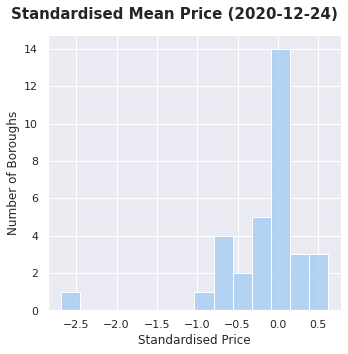

In [112]:
sns.set_style('darkgrid')
ax1 = sns.displot((la_data1.price.mean() - la_data1.price.mean().mean())/la_data1.price.std())
ax1.set(xlabel='Standardised Price', ylabel='Number of Boroughs')
plt.gcf().subplots_adjust(top=0.9)
plt.gcf().suptitle('Standardised Mean Price (2020-12-24)', fontsize=15, fontweight='bold');

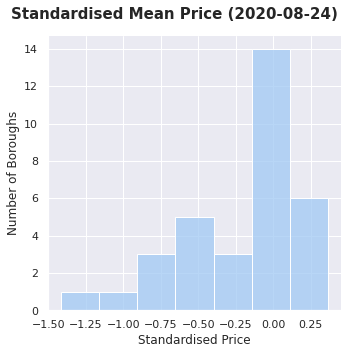

In [113]:
sns.set_style('darkgrid')
ax2 = sns.displot((la_data2.price.mean() - la_data2.price.mean().mean())/la_data2.price.std())
ax2.set(xlabel='Standardised Price', ylabel='Number of Boroughs')
plt.gcf().subplots_adjust(top=0.9)
plt.gcf().suptitle('Standardised Mean Price (2020-08-24)', fontsize=15, fontweight='bold');

# Executive Briefing

## Executive Summary 

## Background and Literature Review

As an important member of short-term rentals, Airbnb has a huge number of rooms, even surpassing "Hilton Worldwide, InterContinental Hotels Group, Wyndham Universal Hotel and other international hotel groups" (The Spaces 2020). What we all recognize is that the global operations of Airbnb have contributed to the booming world economy, especially the promotion of tourism and housing industry. The impact of online short-term rental platforms like Airbnb on the short-term and long-term rental market has always been the focus of government and professional research. A series of black swan effects caused by COVID-19, national blockades, restrictions on the distance between people, and the global economy suffered a huge blow. Global travel enthusiasm has been greatly reduced by the impact of economic shocks, for example, the number of international tourists has dropped by 20-30%((UNWTO 2020b).Airbnb’s global annual bookings in 2020 have greatly reduced, and the rooms that have been booked are cancelled by tenants or homeowners(Nhamo et al 2020). The UK began its second lockdown on November 5, 2020. The epidemic situation is still severe so far. At the same time, Airbnb's operations have also been hit twice. This survey selected two Airbnb listings from August 2020 to December 2020 with a four-month interval(InsideAirbnb 2020). In the Airbnb listing change survey in Wuhan, China, every time the number of new infections doubles, the number of bookings will drop by 4.16%(Maggie and Adrian 2020).Under the supply and demand relationship in the market, the decline in the scheduled quantity will inevitably bring down the price of commodities. The supply of active listings on Airbnb is stable and unaffected by COVID-19, and the decrease in booking activity is mainly due to shrinking demand(Maggie and Adrian 2020). Our hypothesis is that the number of listings on Airbnb is relatively stable during the epidemic. The second outbreak of the virus and the subsequent impact of the epidemic will further reduce people's travel and living demand. The price level in December is lower than scheduled price in August. The purpose is to study the transition from the relief period of the epidemic in August to the aggravation of the epidemic in December. The impact of changes in prices and housing distribution, as well as potential risks and development opportunities. 

### 1 Impact on the London housing rental market 

#### 1.1 National and individual level 

First of all, national bans triggered by the epidemic and tenants’ consideration of life safety issues have led to a reduction in room reservations and an oversupply in the market, resulting in significant price fluctuations between the two times. From a national macro perspective, the depression of the short-term rental market has caused a sharp decline in urban economic returns, which means a decline in the tourism industry. Due to the outbreak, booking prices have dropped by an average of 6.1%, and areas with more severe COVID-19 have fallen even more, which means that landlords will actively adjust listing prices downward in an attempt to increase booking revenue(Maggie and Adrian 2020). At the personal micro level, for landlords who rely on Airbnb to make money, this makes people worry about whether they can pay mortgages, pay bills and survive during the pandemic. However, some commercial accommodation operators exist on the Airbnb platform. The capital chain maintains the company's operations, and they don't need to worry too much, they will invest their properties in the long-term leasing market. The reduction of urban economic income is most importantly reflected in the reduction of housing reservation prices. Figure 1 shows 

#### 1.2 Price difference between room types 

#### 1.3 Covid-19 cases and booking numbers 

### 2 Back to the original intention 

## Reference